In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

In [65]:
df_hist=pd.read_csv("ml_case_training_hist_data.csv")

In [66]:
df_hist.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [67]:
df_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            193002 non-null  object 
 1   price_date    193002 non-null  object 
 2   price_p1_var  191643 non-null  float64
 3   price_p2_var  191643 non-null  float64
 4   price_p3_var  191643 non-null  float64
 5   price_p1_fix  191643 non-null  float64
 6   price_p2_fix  191643 non-null  float64
 7   price_p3_fix  191643 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [68]:
df_hist.dtypes.value_counts()

float64    6
object     2
dtype: int64

In [69]:
df_hist.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [70]:
df_hist.isnull().sum()

id                 0
price_date         0
price_p1_var    1359
price_p2_var    1359
price_p3_var    1359
price_p1_fix    1359
price_p2_fix    1359
price_p3_fix    1359
dtype: int64

In [71]:
df_hist.fillna(0,inplace=True)

In [72]:
df_hist.isnull().sum()

id              0
price_date      0
price_p1_var    0
price_p2_var    0
price_p3_var    0
price_p1_fix    0
price_p2_fix    0
price_p3_fix    0
dtype: int64

In [73]:
df_hist.columns

Index(['id', 'price_date', 'price_p1_var', 'price_p2_var', 'price_p3_var',
       'price_p1_fix', 'price_p2_fix', 'price_p3_fix'],
      dtype='object')

In [74]:
list=['price_date','price_p1_var','price_p2_var','price_p3_var','price_p1_fix','price_p2_fix','price_p3_fix']
for i in list:
    print('{} has unique values as {}'.format(i,df_hist[i].unique()))

price_date has unique values as ['2015-01-01' '2015-02-01' '2015-03-01' '2015-04-01' '2015-05-01'
 '2015-06-01' '2015-07-01' '2015-08-01' '2015-09-01' '2015-10-01'
 '2015-11-01' '2015-12-01']
price_p1_var has unique values as [0.151367 0.149626 0.150321 ... 0.240324 0.242632 0.100986]
price_p2_var has unique values as [0.       0.103395 0.102234 ... 0.097724 0.094609 0.090899]
price_p3_var has unique values as [0.         0.071536   0.070375   0.07515    0.075096   0.068646
 0.069409   0.09872    0.101037   0.069578   0.069848   0.069794
 0.07327    0.070948   0.073989   0.073935   0.091448   0.070381
 0.072713   0.072659   0.069463   0.076311   0.076257   0.07269
 0.075731   0.075677   0.072975   0.073555   0.075004   0.073263
 0.07457    0.074516   0.068617   0.068883   0.068829   0.069223
 0.072682   0.114102   0.104202   0.07037    0.073409   0.073355
 0.073843   0.098101   0.068317   0.066367   0.073873   0.073819
 0.08626    0.068053   0.071174   0.07112    0.074205   0.091564
 0

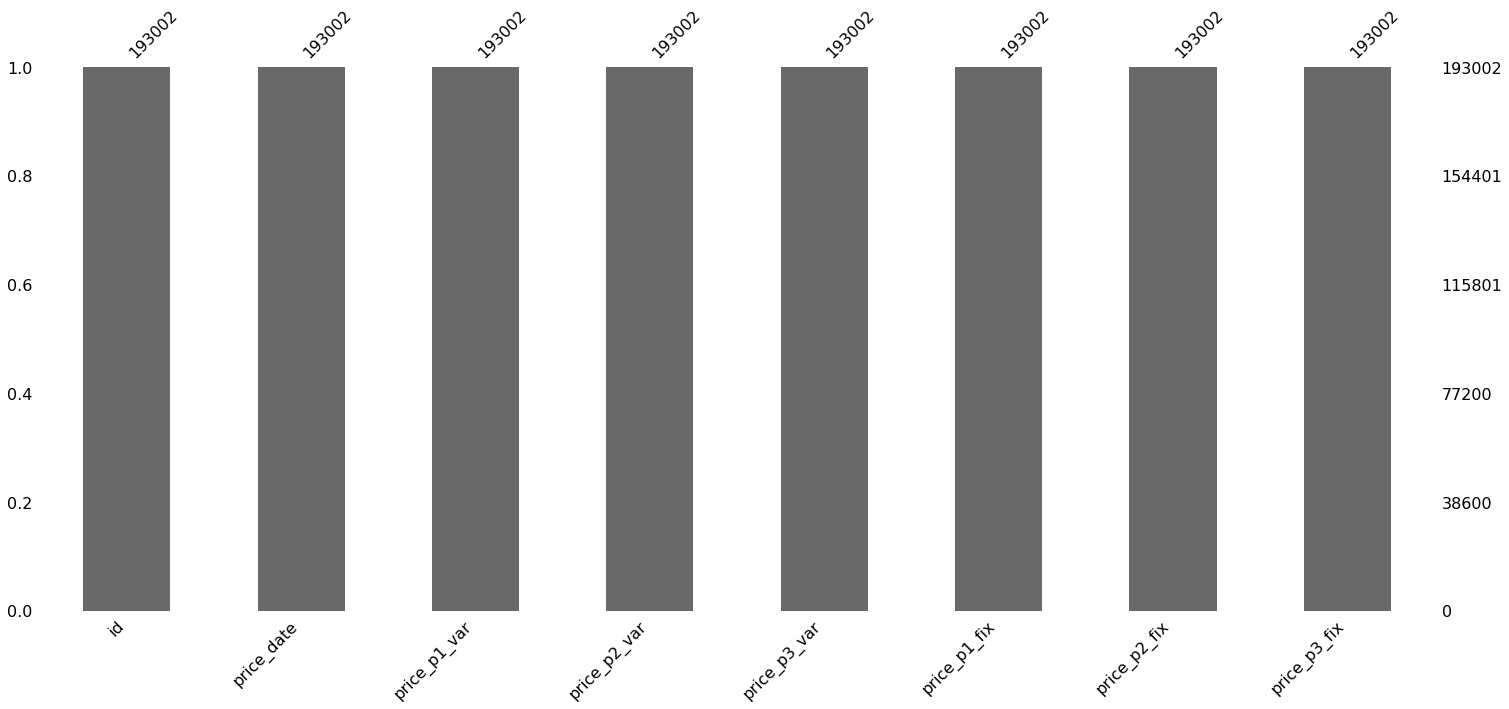

In [78]:
msno.bar(df_hist)

# Main Dataset

In [12]:
df_train=pd.read_csv('ml_case_training_data.csv')

In [13]:
df_train

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,58.995952,f,831.80,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,...,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,...,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,...,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,...,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,18463073fb097fc0ac5d3e040f356987,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,NaN,...,44.311378,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000
16092,d0a6f71671571ed83b2645d23af6de00,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,...,58.995952,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000
16093,10e6828ddd62cbcf687cb74928c4c2d2,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,NaN,...,40.606701,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935
16094,1cf20fd6206d7678d5bcafd28c53b4db,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,NaN,...,44.311378,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000


In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   activity_new              6551 non-null   object 
 2   campaign_disc_ele         0 non-null      float64
 3   channel_sales             11878 non-null  object 
 4   cons_12m                  16096 non-null  int64  
 5   cons_gas_12m              16096 non-null  int64  
 6   cons_last_month           16096 non-null  int64  
 7   date_activ                16096 non-null  object 
 8   date_end                  16094 non-null  object 
 9   date_first_activ          3508 non-null   object 
 10  date_modif_prod           15939 non-null  object 
 11  date_renewal              16056 non-null  object 
 12  forecast_base_bill_ele    3508 non-null   float64
 13  forecast_base_bill_year   3508 non-null   float64
 14  foreca

In [15]:
df_train.isnull().sum()

id                              0
activity_new                 9545
campaign_disc_ele           16096
channel_sales                4218
cons_12m                        0
cons_gas_12m                    0
cons_last_month                 0
date_activ                      0
date_end                        2
date_first_activ            12588
date_modif_prod               157
date_renewal                   40
forecast_base_bill_ele      12588
forecast_base_bill_year     12588
forecast_bill_12m           12588
forecast_cons               12588
forecast_cons_12m               0
forecast_cons_year              0
forecast_discount_energy      126
forecast_meter_rent_12m         0
forecast_price_energy_p1      126
forecast_price_energy_p2      126
forecast_price_pow_p1         126
has_gas                         0
imp_cons                        0
margin_gross_pow_ele           13
margin_net_pow_ele             13
nb_prod_act                     0
net_margin                     15
num_years_anti

In [16]:
df_train.fillna(0,inplace=True)

In [17]:
df_train.isnull().sum()

id                          0
activity_new                0
campaign_disc_ele           0
channel_sales               0
cons_12m                    0
cons_gas_12m                0
cons_last_month             0
date_activ                  0
date_end                    0
date_first_activ            0
date_modif_prod             0
date_renewal                0
forecast_base_bill_ele      0
forecast_base_bill_year     0
forecast_bill_12m           0
forecast_cons               0
forecast_cons_12m           0
forecast_cons_year          0
forecast_discount_energy    0
forecast_meter_rent_12m     0
forecast_price_energy_p1    0
forecast_price_energy_p2    0
forecast_price_pow_p1       0
has_gas                     0
imp_cons                    0
margin_gross_pow_ele        0
margin_net_pow_ele          0
nb_prod_act                 0
net_margin                  0
num_years_antig             0
origin_up                   0
pow_max                     0
dtype: int64

In [18]:
df=df_train
for i in df:
    print('{} has unique values as {}'.format(i,df_train[i].unique()))

id has unique values as ['48ada52261e7cf58715202705a0451c9' '24011ae4ebbe3035111d65fa7c15bc57'
 'd29c2c54acc38ff3c0614d0a653813dd' ... '10e6828ddd62cbcf687cb74928c4c2d2'
 '1cf20fd6206d7678d5bcafd28c53b4db' '563dde550fd624d7352f3de77c0cdfcd']
activity_new has unique values as ['esoiiifxdlbkcsluxmfuacbdckommixw' 0 'sfisfxfcocfpcmckuekokxuseixdaoeu'
 'sscfoipxikopfskekuobeuxkxmwsuucb' 'cssldxpacdmuuaulamxdekcokibauube'
 'ppcxfxbffsxaakxamcdpexdoxulfwwae' 'kkklcdamwfafdcfwofuscwfwadblfmce'
 'apdekpcbwosbxepsfxclislboipuxpop' 'xwkaesbkfsacseixxksofpddwfkbobki'
 'lckfspcixfmlwudlisbaiacuioicciam' 'daobdssbkieoukwxbopxiiospudkopwl'
 'cccpsslxcemdlomsaffxsecccbxpdkax' 'kwuslieomapmswolewpobpplkaooaaew'
 'ifppdlcfssupdcsdcclkoubulccouwml' 'mwmuuaeloxbawummwfwcmxckmsfibpwk'
 'almlfkoedpwfdmmsebsdwueskducuiok' 'wlxfbefauebfbauopppswxppaafdkoap'
 'cwkwaxadbfukekuspislmbipbkxdudla' 'cluecxlameloamldmasudocsbmaoamdw'
 'pmccdfmdxpmdeodsasdeboedildifmlp' 'paoauaefwcbedmiowwmokakuisslckbd'
 'bapcuxcous

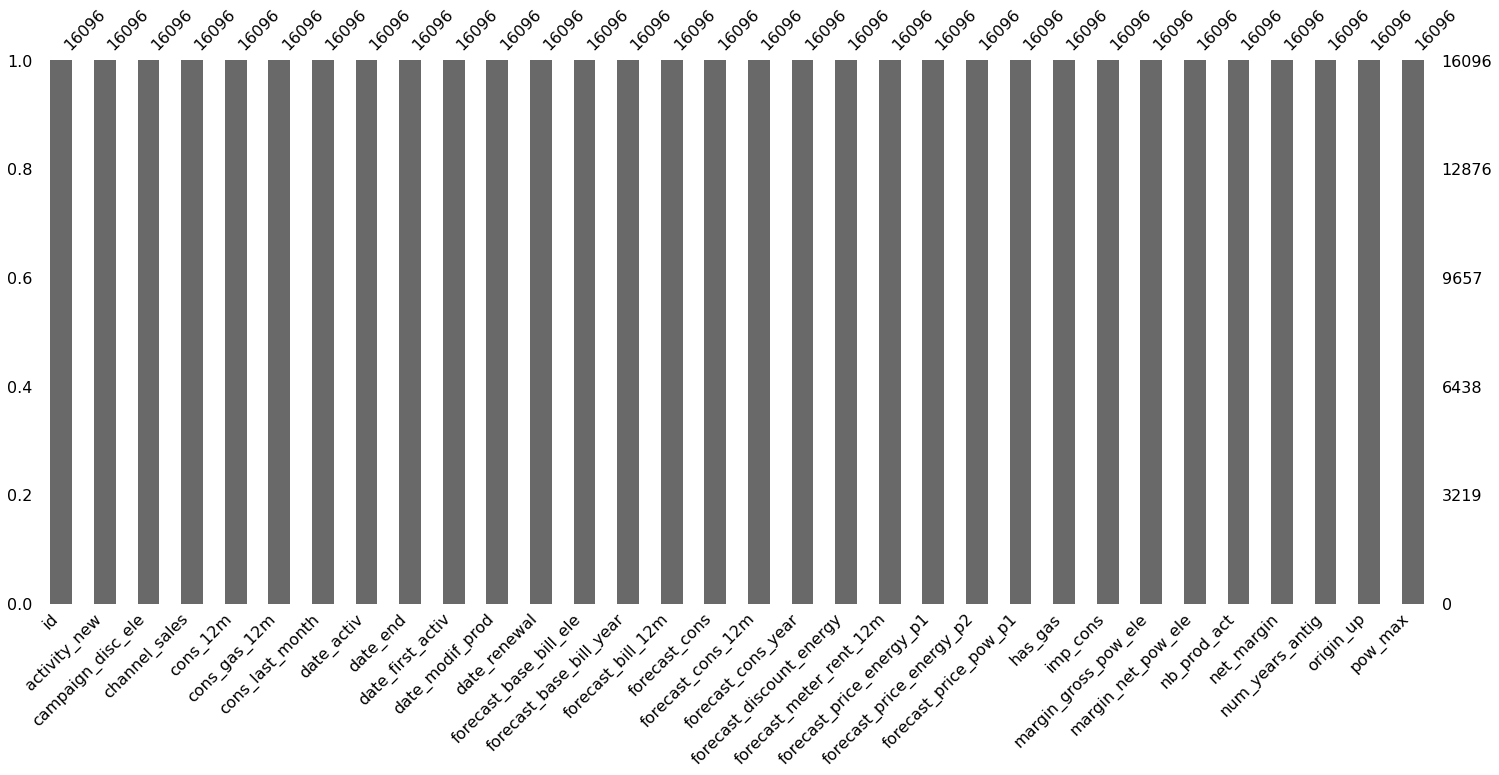

In [82]:
msno.bar(df_train)

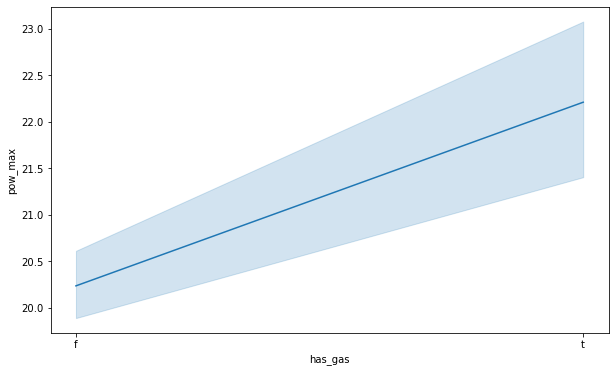

In [19]:
plt.figure(figsize=(10,6))
sns.lineplot(x='has_gas',y='pow_max',data=df_train)

(array([7.0000e+00, 1.5967e+04, 1.1900e+02, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-4148.99 , -1277.026,  1594.938,  4466.902,  7338.866, 10210.83 ,
        13082.794, 15954.758, 18826.722, 21698.686, 24570.65 ]),
 <a list of 10 Patch objects>)

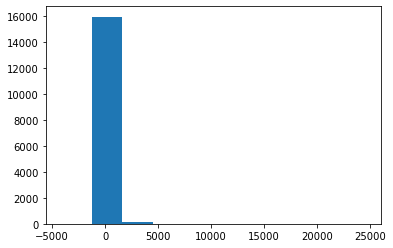

In [21]:
plt.hist(df_train['net_margin'])

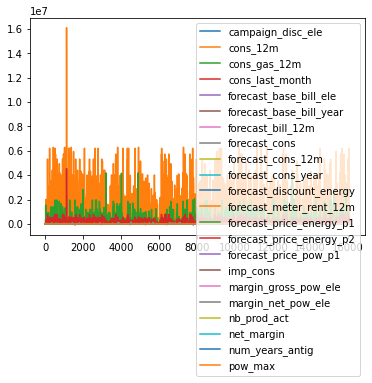

In [27]:
df_train.plot()

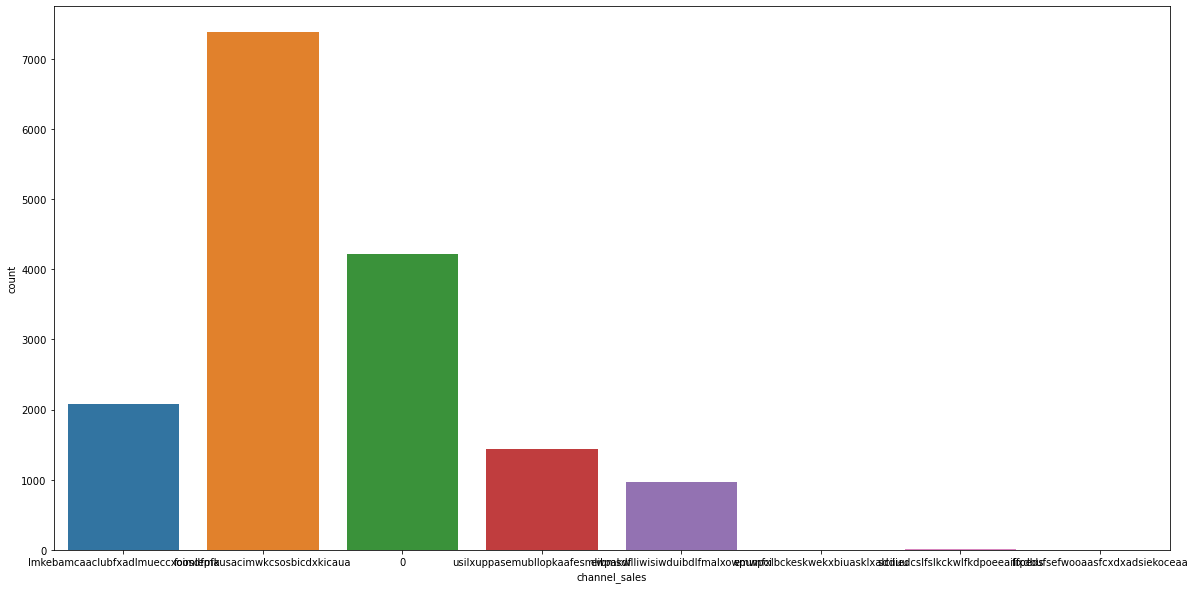

In [34]:
plt.figure(figsize=(20,10))
sns.countplot(x=df_train['channel_sales'])

Text(0.5, 1.0, 'Price vs Energy')

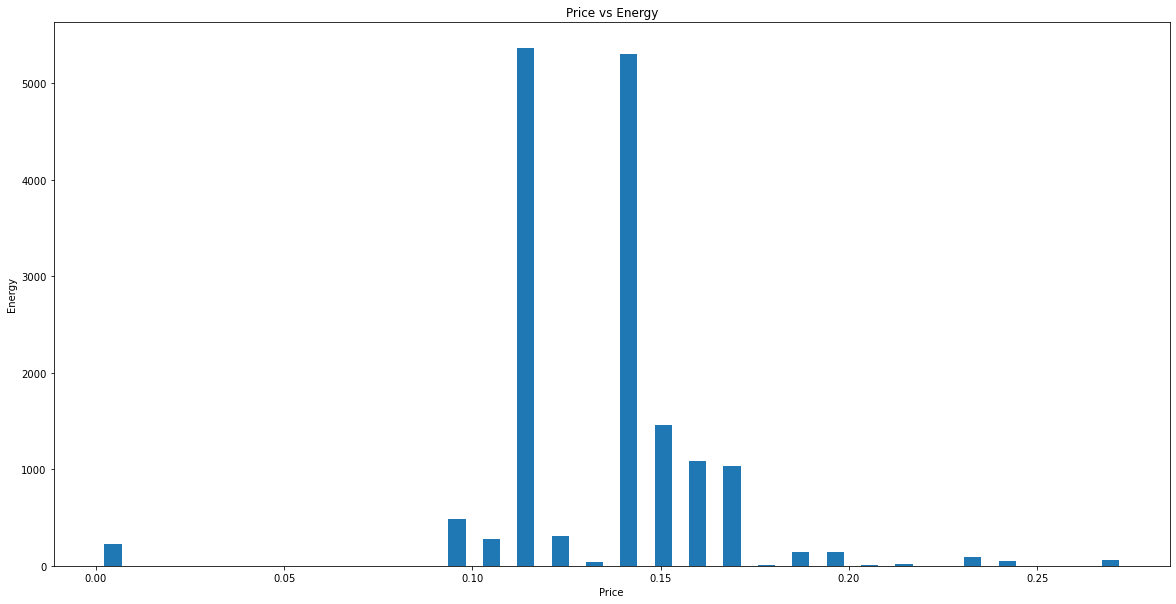

In [83]:
plt.figure(figsize=(20,10))
plt.hist(df_train['forecast_price_energy_p1'],bins=30,rwidth=0.5)
plt.xlabel('Price')
plt.ylabel('Energy')
plt.title('Price vs Energy')

Text(0.5, 1.0, 'Price vs Energy')

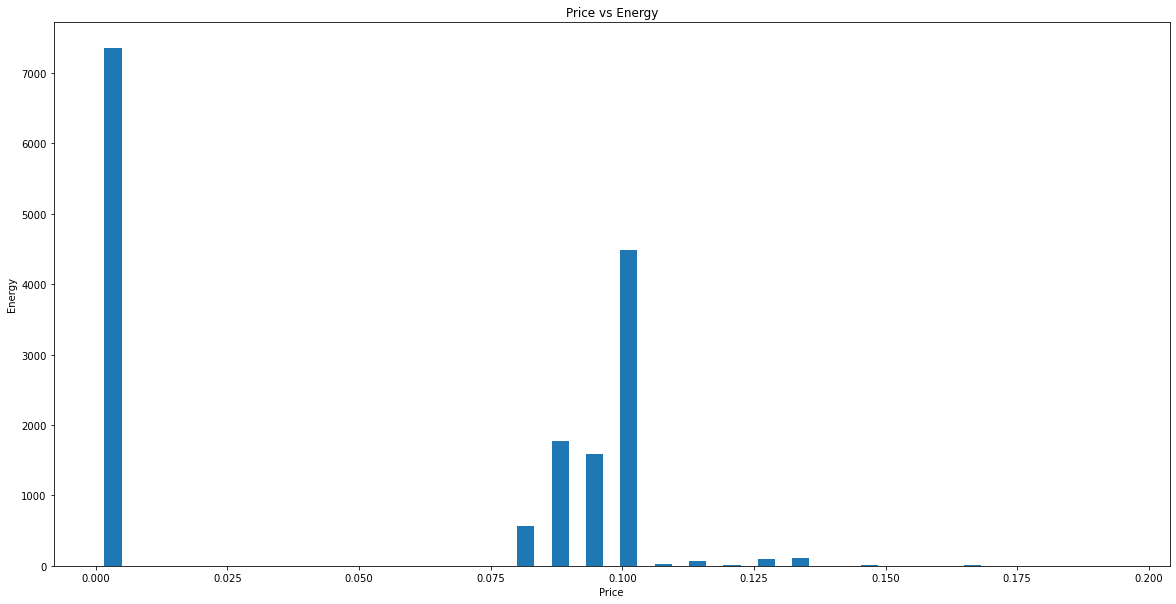

In [84]:
plt.figure(figsize=(20,10))
plt.hist(df_train['forecast_price_energy_p2'],bins=30,rwidth=0.5)
plt.xlabel('Price')
plt.ylabel('Energy')
plt.title('Price vs Energy')

Text(0.5, 1.0, 'Price vs Energy')

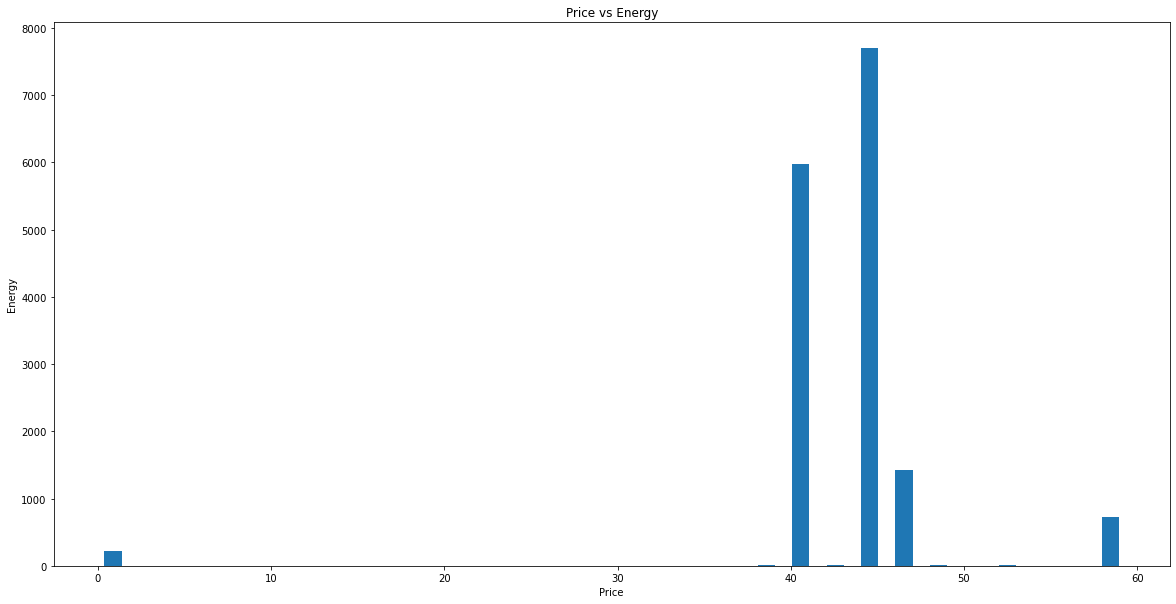

In [86]:
plt.figure(figsize=(20,10))
plt.hist(df_train['forecast_price_pow_p1'],bins=30,rwidth=0.5)
plt.xlabel('Price')
plt.ylabel('Energy')
plt.title('Price vs Energy')

# Output Dataset

In [87]:
df_out=pd.read_csv("ml_case_training_output.csv")

In [88]:
df_out.head()

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,0


In [90]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      16096 non-null  object
 1   churn   16096 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 251.6+ KB


In [91]:
df_out.describe()

,churn
count,16096.000000
mean,0.099093
std,0.298796
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


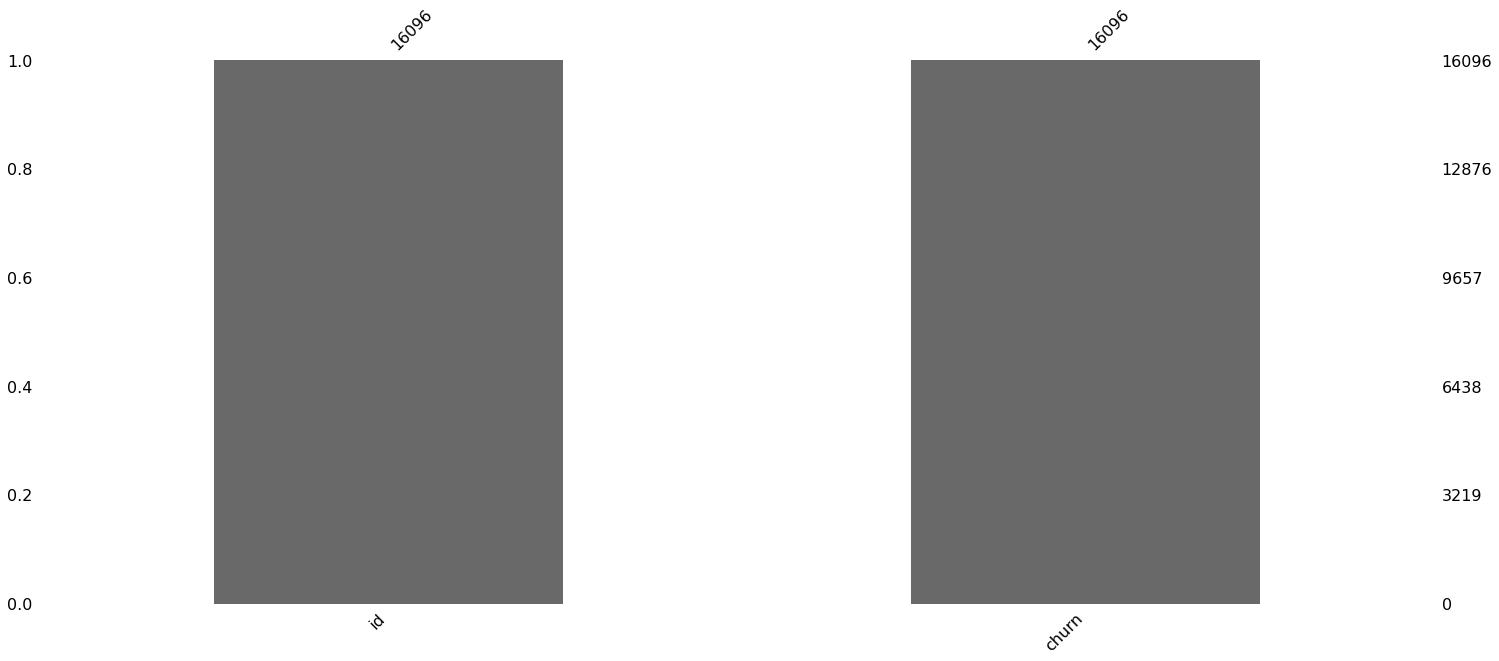

In [93]:
msno.bar(df_out)